<a href="https://colab.research.google.com/github/qcbegin/DSME6635-S24/blob/main/problem_sets/PS6_CV_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Set 6 - Convolution Neural Networks

### Due at 12:30PM, Tuesday, April 9, 2024

Please first copy the CoLab file onto your own Google Drive. Finish the questions below and submit the **CoLab link** of your solutions in [this Google Sheet](https://docs.google.com/spreadsheets/d/1nOE-saTptG73WMCONDB1Z3pt-jHhmDA_1OHpQVHqQ1M/edit#gid=558144135). The total achievable points are 8 for this problem set. Please name you solution as

- `Member1LastName_Member1FirstName-Member2LastName_Member2FirstName_PS6.ipynb` (e.g., `Cao_Leo-Zhang_Renyu_PS6.ipynb`)

In this problem set, your job is to implement the imfamous image classification algorithms such as AlexNet and ResNet. We will then implement a simple emotion detection algorithm as the subsequent taks.


## 1. AlexNet
In this exercise, you will use Keras to build a replicate the famous [AlexNet](https://papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf) paper. This paper utilizes a 10-layer network to classify images from [ImageNet](https://image-net.org/) to 1,000 classes.

The architecture of Alexnet is:

![Alexnet](https://raw.githubusercontent.com/blurred-machine/Data-Science/master/Deep%20Learning%20SOTA/img/alexnet2.png)


In the following your will implement the following convolution neural network (CNN) model following the parameter setting in AlexNet.

**Note**: Please read the comments carefully to understand what layers to add. There are couple of differences between what we implement here and the original paper:

1. In the last layer, you add a softmax with `num_classes` while the original paper will use the `num_classes` in ImageNet.

2. We will use the toy training data [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) instead of ImageNet. This means the final outcome is a classification of 10 objects.

**Note:** We eventually are training on 10,000 images with 2 classes, so this will take 5 to 10 minutes depending on how much computational resource Google allocates to you. Good luck!

In [1]:
import numpy as np
import tensorflow as tf
from tqdm import tqdm
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout


class AlexNet(Sequential):
    def __init__(self, input_shape, num_classes):
        """
        This is a class that implements AlexNet. In the following you need to add the
        following layers:
            1. 1st Conv2D with proper kernel size, channel size, strides, activation, input_shape,
            padding = 'valid', kernel_initializer='he_normal' (read the ResNet paper if you are interested)
            2. MaxPooling2D with proper strides, pool_size, padding='same'
            3. 2nd Conv2D with similar proper parameters, padding='same'
            4. MaxPooling2D with similar proper parameters
            5. 3rd Conv2D with similar proper parameters
            6. 4th Conv2D with similar proper paramteres
            7. 5th Conv2D with similar proper parameters
            8. MaxPooling2D with similar proper parameters
            9. A flatten layer
            10. A Dense layer with activation = 'relu' with proper output size
            11. A Dense layer with activiation = 'relu' with proper output size
            12. A Dense layer with activation = 'relu' with proper output size
            13. A Dense layer with softmax activation and output = num_classes
        """
        super().__init__()

        ### BEGIN SOLUTION
        self.add(Conv2D(filters=96, kernel_size=11, strides=4, input_shape=input_shape, padding='valid', kernel_initializer='he_normal', activation='relu'))
        self.add(MaxPooling2D(pool_size=3, strides=2, padding='same'))
        self.add(Conv2D(filters=256, kernel_size=5, strides=1, padding='same', activation='relu'))
        self.add(MaxPooling2D(pool_size=3, strides=2, padding='same'))
        self.add(Conv2D(filters=384, kernel_size=3, strides=1, padding='same', activation='relu'))
        self.add(Conv2D(filters=384, kernel_size=3, strides=1, padding='same', activation='relu'))
        self.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
        self.add(MaxPooling2D(pool_size=3, strides=2, padding='same'))
        self.add(Flatten())
        self.add(Dense(4096, activation='relu'))
        self.add(Dense(4096, activation='relu'))
        self.add(Dense(1000, activation='relu'))
        self.add(Dense(num_classes, activation='softmax'))
        ### END SOLUTION

        self.compile(optimizer= tf.keras.optimizers.Adam(0.001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])


def Prepare_CIFAR10():
    """
    This function downloads and prepare the CIFAR10 dataset for training and testing.
    Output:
        train_generate, val_generator, test_generator: image data generator
        x_Train, y_train, x_val, y_val, x_test, y_test: training, validation and testing data
    """
    (x_train, y_train),(x_test, y_test)=cifar10.load_data()
    # we only sample 2 classes and 10% of the data
    index_1 = np.random.choice(np.concatenate([np.where(y_train == 0)[0], np.where(y_train == 1)[0]]), 5000)
    index_2 = np.random.choice(np.concatenate([np.where(y_test == 0)[0], np.where(y_test == 1)[0]]), 5000)
    x_train = x_train[index_1]
    x_test = x_test[index_2]
    y_train = y_train[index_1]
    y_test = y_test[index_2]
    x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)
    y_train=to_categorical(y_train)
    y_val=to_categorical(y_val)
    y_test=to_categorical(y_test)
    train_generator = ImageDataGenerator(rescale=1./255, rotation_range=2, horizontal_flip=True,zoom_range=.1)
    val_generator = ImageDataGenerator(rescale=1./255, rotation_range=2, horizontal_flip=True,zoom_range=.1)
    test_generator = ImageDataGenerator(rescale=1./255, rotation_range=2, horizontal_flip= True,zoom_range=.1)
    train_generator.fit(x_train)
    val_generator.fit(x_val)
    test_generator.fit(x_test)
    return train_generator, val_generator, test_generator, x_train, y_train, x_val, y_val, x_test, y_test

In [2]:
from keras.callbacks import ReduceLROnPlateau
lrr = ReduceLROnPlateau(monitor='val_acc', factor=.01, patience=3, min_lr=1e-5) # Reduce the learning rate when the validation accuracy stops improving.

train_generator, val_generator, test_generator, x_train, y_train, x_val, y_val, x_test, y_test = Prepare_CIFAR10()
model = AlexNet((32, 32, 3), 2)
assert list(model.layers[0].weights[0].shape) == [11, 11, 3, 96]
assert list(model.layers[0].weights[1].shape) == [96]
assert list(model.layers[2].weights[0].shape) == [5, 5, 96, 256]
assert len(model.layers) == 13
### BEGIN HIDDEN TESTS
assert list(model.layers[4].weights[0].shape) == [3, 3, 256, 384]
assert list(model.layers[12].weights[0].shape) == [1000, 2]
### END HIDDEN TESTS

170498071/170498071 [==============================] - 4s 0us/step


In [6]:
model.fit(train_generator.flow(x_train, y_train, batch_size=32),
          epochs=10, steps_per_epoch=100,
          validation_data=val_generator.flow(x_val, y_val, batch_size=32),
          validation_steps = x_val.shape[0], verbose=1)
assert np.sum(model.predict(np.array([x_test[1]])) == y_test[1]) == 2

Epoch 1/10
100/100 [==============================] - ETA: 0s - loss: 0.2440 - accuracy: 0.8994

100/100 [==============================] - 5s 49ms/step - loss: 0.2440 - accuracy: 0.8994 - val_loss: 0.2863 - val_accuracy: 0.8873
Epoch 2/10
100/100 [==============================] - 3s 27ms/step - loss: 0.2378 - accuracy: 0.9050
Epoch 3/10
100/100 [==============================] - 3s 31ms/step - loss: 0.2405 - accuracy: 0.8969
Epoch 4/10
100/100 [==============================] - 3s 25ms/step - loss: 0.2124 - accuracy: 0.9145
Epoch 5/10
100/100 [==============================] - 2s 23ms/step - loss: 0.2224 - accuracy: 0.9157
Epoch 6/10
100/100 [==============================] - 2s 21ms/step - loss: 0.2036 - accuracy: 0.9164
Epoch 7/10
100/100 [==============================] - 3s 30ms/step - loss: 0.2151 - accuracy: 0.9160
Epoch 8/10
100/100 [==============================] - 2s 21ms/step - loss: 0.2068 - accuracy: 0.9138
Epoch 9/10
100/100 [==============================] - 2s 21ms/step - loss: 0.2085 - accuracy: 0.9172
Epoch 10/10
1/1 [==============================] - 0s 16ms/s

## 2. ResNet-50 Training

In this section, we are going to apply ResNet-50 to a gender classification on 500 [Cryptopunk](https://www.larvalabs.com/cryptopunks) images. We are going to rely on the [ResNet-50 implementation from Keras](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/ResNet50). In particular, we will use weights trained from imagenet data and average pooling for our ResNet50. All images are in [**the course GitHub site**](https://github.com/rphilipzhang/AI-PhD-S24/tree/179826a3f4ae099ace55735a662eed5ad20f6a7f/Data/PS6) and should be uploaded to this notebook. Labels of the images are stored in `gender_label.csv**`, which is also in [**the course GitHub site**](https://github.com/rphilipzhang/AI-PhD-S24/tree/179826a3f4ae099ace55735a662eed5ad20f6a7f/Data/PS6) (again it should be uploaded to this notebook). The application will be decomposed into two functions which will be tested individually.

1. `load_image_label()`: This function will load images and labels and return four variables: `X_train`, `X_test`, `y_train`, `y_test`. You will need to load images and labels, convert images to array-like data frame, center pixel value of images to 0 by dividing 255, and split image data and label data into training dataset and testing dataset by 80% : 20%.

2. `ResNet50_Adoption(X_train,X_test,y_train,y_test)`: This function does the following:

 - Build a CNN model by adopting existing `ResNet50` model and keep its original weights.
 - Train the model with `X_train` and `y_train`.
 - Test the model with `X_test` and `y_test`.
 - Return trained model and model accuracy on gender classfication on testing dataset.

  2.1. **The model starts with `ResNet50`, then a `BatchNormalization` layer, then a `Dense` layer with 16 neurons and `ReLu` activation function, then another `BatchNormalization` layer, and at last a `Softmax` layer to predict the gender.**

  2.2. The model will be trained on the training data and evaluated on the testing data. The model will be trained with `binary_crossentropy` as the loss and `accuracy` as the metric. We will train for 80 epochs with `batch_size = 16` and `validation_split` to be 0.1.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.applications import ResNet50
import os
from PIL import Image
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from google.colab import files
uploaded = files.upload()

Saving gender_label.csv to gender_label.csv
Saving 99.png to 99.png
Saving 98.png to 98.png
Saving 97.png to 97.png
Saving 96.png to 96.png
Saving 95.png to 95.png
Saving 94.png to 94.png
Saving 93.png to 93.png
Saving 92.png to 92.png
Saving 91.png to 91.png
Saving 90.png to 90.png
Saving 9.png to 9.png
Saving 89.png to 89.png
Saving 88.png to 88.png
Saving 87.png to 87.png
Saving 86.png to 86.png
Saving 85.png to 85.png
Saving 84.png to 84.png
Saving 83.png to 83.png
Saving 82.png to 82.png
Saving 81.png to 81.png
Saving 80.png to 80.png
Saving 8.png to 8.png
Saving 79.png to 79.png
Saving 78.png to 78.png
Saving 77.png to 77.png
Saving 76.png to 76.png
Saving 75.png to 75.png
Saving 74.png to 74.png
Saving 73.png to 73.png
Saving 72.png to 72.png
Saving 71.png to 71.png
Saving 70.png to 70.png
Saving 7.png to 7.png
Saving 69.png to 69.png
Saving 68.png to 68.png
Saving 67.png to 67.png
Saving 66.png to 66.png
Saving 65.png to 65.png
Saving 64.png to 64.png
Saving 63.png to 63.png
Sa

In [8]:
def load_image_label():

  X_train = X_test = y_train = y_test = None

  ### BEGIN YOUR SOLUTION
  img_names = [name for name in uploaded.keys() if name.endswith('.png')]
  labels = pd.read_csv('gender_label.csv')['type']

  X = np.zeros((len(img_names), 32, 32, 3))
  y = []

  for index, img_name in enumerate(img_names):
    id = int(img_name.split('.')[0])
    img = Image.open(img_name)
    img = img.resize((32, 32))
    img = np.array(img)
    X[index] = img
    y.append(labels[id])

  X = np.array(X) / 255 # normalize the image
  y = to_categorical([0 if i == "Male" else 1 for i in y])
  X_train, X_test, y_train, y_test = train_test_split(X[:500], y[:500], test_size=0.2)

  ### END YOUR SOLUTION

  return X_train, X_test, y_train, y_test

In [9]:
os.environ['PYTHONHASHSEED']=str(1)
tf.random.set_seed(1)

X_train, X_test, y_train, y_test= load_image_label()

assert X_train.shape == (400, 32, 32, 3)
assert X_test.shape == (100, 32, 32, 3)

In [10]:
def ResNet50_Adoption(X_train,X_test,y_train,y_test):
  """
  The function will take training and testing data and output the trained model
  based on the training data as well as the score representing the accuracy of
  the model evaluated on the testing data.
  """

  model = Sequential()
  score = 0

  ### BEGIN YOUR SOLUTION
  model.add(ResNet50(include_top=False, weights='imagenet', input_shape=(32, 32, 3), pooling='avg'))
  model.add(BatchNormalization())
  model.add(Dense(16, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(2, activation='softmax'))

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  model.fit(X_train, y_train, epochs=80, batch_size=16, validation_split=0.1)
  score = model.evaluate(X_test, y_test)

  ### END YOUR SOLUTION

  return model, score


In [11]:
os.environ['PYTHONHASHSEED']=str(1)
tf.random.set_seed(1)

model,score = ResNet50_Adoption(X_train,X_test,y_train,y_test)

assert score[1] > 0.9

94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/80
23/23 [==============================] - 44s 156ms/step - loss: 0.6712 - accuracy: 0.6639 - val_loss: 0.6840 - val_accuracy: 0.6250
Epoch 2/80
23/23 [==============================] - 1s 47ms/step - loss: 0.4005 - accuracy: 0.8694 - val_loss: 1.0527 - val_accuracy: 0.6250
Epoch 3/80
23/23 [==============================] - 1s 48ms/step - loss: 0.2939 - accuracy: 0.9222 - val_loss: 1.0753 - val_accuracy: 0.6250
Epoch 4/80
23/23 [==============================] - 1s 60ms/step - loss: 0.2526 - accuracy: 0.9333 - val_loss: 1.0048 - val_accuracy: 0.6250
Epoch 5/80
23/23 [==============================] - 2s 66ms/step - loss: 0.1672 - accuracy: 0.9806 - val_loss: 1.0700 - val_accuracy: 0.6250
Epoch 6/80
23/23 [==============================] - 1s 49ms/step - loss: 0.1752 - accuracy: 0.9667 - val_loss: 1.1025 - val_accuracy: 0.6250
Epoch 7/80
23/23 [==============================] - 1s 47ms/step - loss: 0.1395 - accur

4/4 [==============================] - 1s 15ms/step


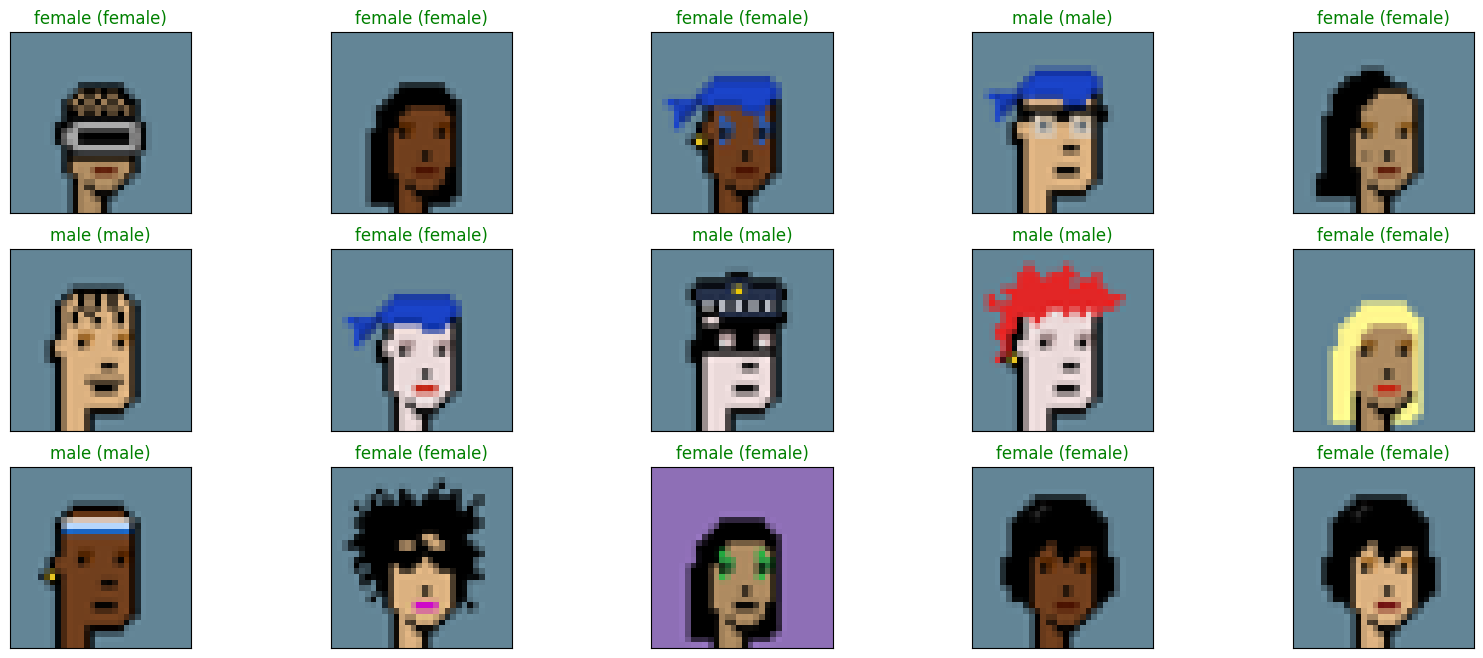

In [12]:
#show some examples
labels = ['male','female']
y_hat = model.predict(X_test)
figure = plt.figure(figsize=(20,8))
for i, index in enumerate(np.random.choice(X_test.shape[0],size=15,replace=False)):
    ax = figure.add_subplot(3,5,i+1,xticks=[],yticks=[])
    img = np.squeeze(X_test[index])
    img *= 255
    ax.imshow(img.astype('uint8'))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    ax.set_title("{} ({})".format(labels[predict_index],labels[true_index]),color=("green" if predict_index == true_index else "red"))
plt.show()

# End of Problem Set 6.